In [5]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the simulator endpoint
SIMULATOR_URL = "http://localhost:8080/simulate"

# Example request data
request_data = {
    "totalResource": {
        "GPU": 100,
        "CPU": 16000,
        "Memory": 32000000
    },
    "queues": [
        {
            "uid": "queue1",
            "name": "test-queue",
            "priority": 0,
            "resourceShare": {
                "gpu": {
                    "deserved": 10,
                    "request": 100,
                    "overQuotaWeight": 3
                }
            }
        },
        {
            "uid": "queue2",
            "name": "test-queue2",
            "priority": 0,
            "resourceShare": {
                "gpu": {
                    "deserved": 10,
                    "request": 100,
                    "overQuotaWeight": 1
                }
            }
        }
    ]
}

# Make request to simulator
response = requests.post(SIMULATOR_URL, json=request_data)
results = response.json()

# Convert results to DataFrame for easier visualization
df = pd.DataFrame.from_dict(results, orient='index')
print("\nFair Share Results:")
print(df)



Fair Share Results:
        gpu    cpu  memory
queue1   70  16000  100000
queue2   30  16000  100000


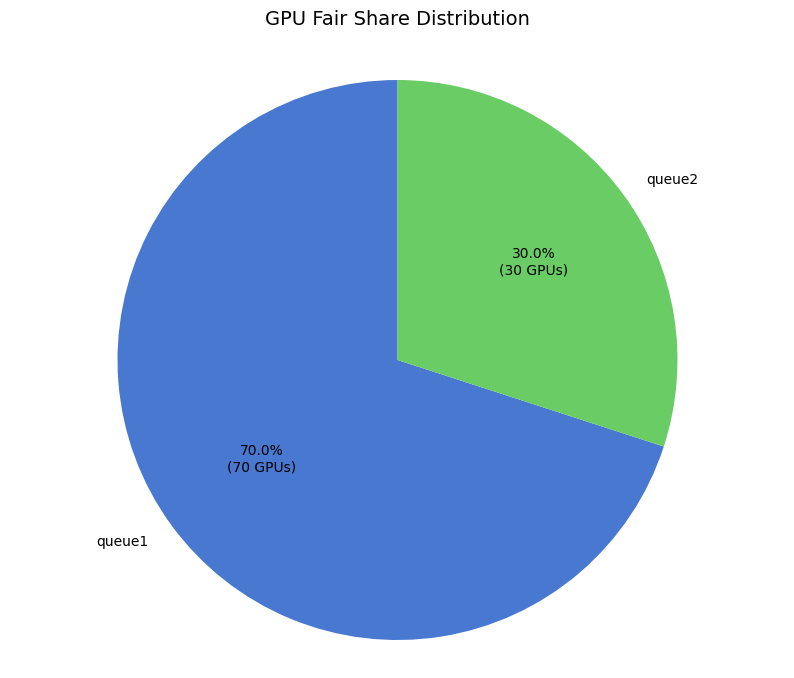


GPU Fair Share Values:
queue1    70
queue2    30
Name: gpu, dtype: int64


In [10]:
# Create a pie chart for GPU allocation
fig, ax = plt.subplots(figsize=(10, 8))

# Add a title
plt.title('GPU Fair Share Distribution', fontsize=14, pad=20)

# Create custom labels with both percentage and absolute values
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val} GPUs)'
    return my_autopct

# Create pie chart with clean styling
colors = ['#4878CF', '#6ACC65']  # Professional blue and green
wedges, texts, autotexts = plt.pie(df['gpu'], 
                                  labels=df.index, 
                                  autopct=make_autopct(df['gpu']),
                                  startangle=90,
                                  colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

# Print the actual GPU values
print("\nGPU Fair Share Values:")
print(df['gpu'])


IntSlider(value=10, description='Queue1 Deserved:', style=SliderStyle(description_width='initial'))

IntSlider(value=10, description='Queue2 Deserved:', style=SliderStyle(description_width='initial'))

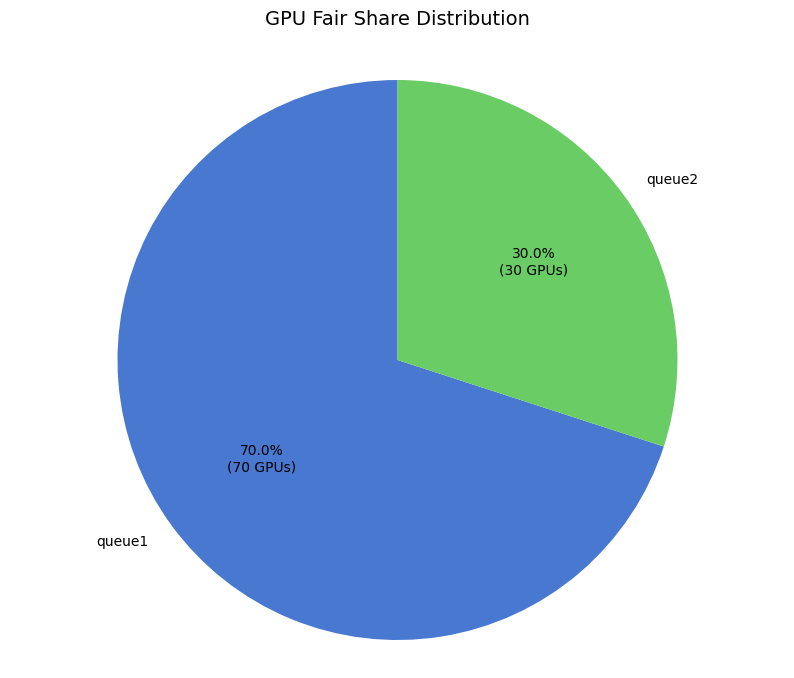


GPU Fair Share Values:
queue1    70
queue2    30
Name: gpu, dtype: int64

Configuration:
Queue1:
  Deserved: 10
  Request: 100
  OverQuotaWeight: 3
Queue2:
  Deserved: 10
  Request: 100
  OverQuotaWeight: 1


In [7]:
# Create sliders for deserved values
queue1_deserved = widgets.IntSlider(
    value=10,
    min=0,
    max=100,
    step=1,
    description='Queue1 Deserved:',
    style={'description_width': 'initial'}
)

queue2_deserved = widgets.IntSlider(
    value=10,
    min=0,
    max=100,
    step=1,
    description='Queue2 Deserved:',
    style={'description_width': 'initial'}
)

def update_visualization(change):
    # Update request data with new deserved values
    request_data['queues'][0]['resourceShare']['gpu']['deserved'] = queue1_deserved.value
    request_data['queues'][1]['resourceShare']['gpu']['deserved'] = queue2_deserved.value
    
    # Make request to simulator
    response = requests.post(SIMULATOR_URL, json=request_data)
    results = response.json()
    
    # Convert results to DataFrame
    df = pd.DataFrame.from_dict(results, orient='index')
    
    # Clear previous output
    clear_output(wait=True)
    
    # Display sliders
    display(queue1_deserved)
    display(queue2_deserved)
    
    # Create pie chart
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.title('GPU Fair Share Distribution', fontsize=14, pad=20)
    
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return f'{pct:.1f}%\n({val} GPUs)'
        return my_autopct
    
    colors = ['#4878CF', '#6ACC65']
    wedges, texts, autotexts = plt.pie(df['gpu'], 
                                      labels=df.index, 
                                      autopct=make_autopct(df['gpu']),
                                      startangle=90,
                                      colors=colors)
    
    plt.axis('equal')
    plt.show()
    
    # Print the fair share values
    print("\nGPU Fair Share Values:")
    print(df['gpu'])
    
    print("\nConfiguration:")
    for i, queue in enumerate(request_data['queues'], 1):
        print(f"Queue{i}:")
        print(f"  Deserved: {queue['resourceShare']['gpu']['deserved']}")
        print(f"  Request: {queue['resourceShare']['gpu']['request']}")
        print(f"  OverQuotaWeight: {queue['resourceShare']['gpu']['overQuotaWeight']}")

# Register the update function to both sliders
queue1_deserved.observe(update_visualization, names='value')
queue2_deserved.observe(update_visualization, names='value')

# Initial display
display(queue1_deserved)
display(queue2_deserved)
update_visualization(None)
